## Strategy:

- at current price if last k days is trend_decreasing and current price < price_lastk_days => buy 
- at current price if last k days is trend_increasing and current price > price_last_k_days => sell 

In [10]:
import pandas as pd 
import numpy as np 
import os 
import requests
import time 
import logging
import matplotlib.pylab as plt 
import matplotlib



plt.style.use('seaborn-whitegrid')


#===
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 20),
          'font.family': 'serif',
          'font.sans-serif':'DejaVu Sans',
         'axes.titlesize':'30', 
#         'axes.labelize':'100',
        'axes.labelsize': 'medium',
          'grid.alpha': '.5',
         'xtick.labelsize':15,
         'ytick.labelsize':10
         }

plt.rcParams.update(params)
TOKEN_CRYPTO = os.environ.get("TOKEN_CRYPTO")

SYMBOL ='XRP'

In [3]:


def download_price(from_symbol, to_symbol, exchange='Bitstamp', datetime_interval='day',save=True):
    
    base_url = 'https://min-api.cryptocompare.com/data/v2/histo'
    
    url = base_url+ datetime_interval
    
    params = {'fsym': from_symbol,
              'tsym': to_symbol,
#               'limit': 2000, 
              'allData':'true',
              'aggregate': 1,
              "api_key": TOKEN_CRYPTO,
              'e': exchange}
    
    request = requests.get(url, params=params)
    data = request.json()
    if save:
        filename = '{symbol}_price_{date}.csv'.format(symbol=from_symbol,date=time.strftime('%Y%m%d'))
        df = pd.DataFrame(data['Data']['Data'])
        df.to_csv(filename,index=False)
        logging.info('file saved in {}'.format(filename))
    return data


# ===========================================
def _trend_decreasing(datum, length=3):
    """ """
    data = datum.copy()
    if "close" not in data.columns:
        return data
    
    def stricly_decreasing(series, n):
        a =  all([i > j for i, j in zip(series[-n:], series[1:])])
        return a

    close = data["close"]
   

    decreasing = close.rolling(length, min_periods=length).apply(
        stricly_decreasing, args=(length,), raw=False
    )
#     Percentage change between the current and a prior element.
    decreasing_perc = close.pct_change(periods=length)
    decreasing.fillna(0, inplace=True)
    decreasing = decreasing.astype(bool)
    data["trend_decreasing_last_{}_days".format(length)] = decreasing
    data["trend_decreasing_last_{}_days".format(length)] = data["trend_decreasing_last_{}_days".format(length)].shift(1)
    data["trend_decreasing_perc_{}".format(length)] = decreasing_perc
#     data['decreasing_shift_last_2_days'] = data['trend_decreasing_last_2_days'].shift(1)

    return data



def to_date(x):
    '''
    '''
       
    x = pd.Timestamp(x,unit='s').date()
    return x

In [4]:
datum = download_price(from_symbol='XRP',to_symbol='USD',datetime_interval='day')

In [5]:

# data = _trend_decreasing(data)


NameError: name 'tmp' is not defined

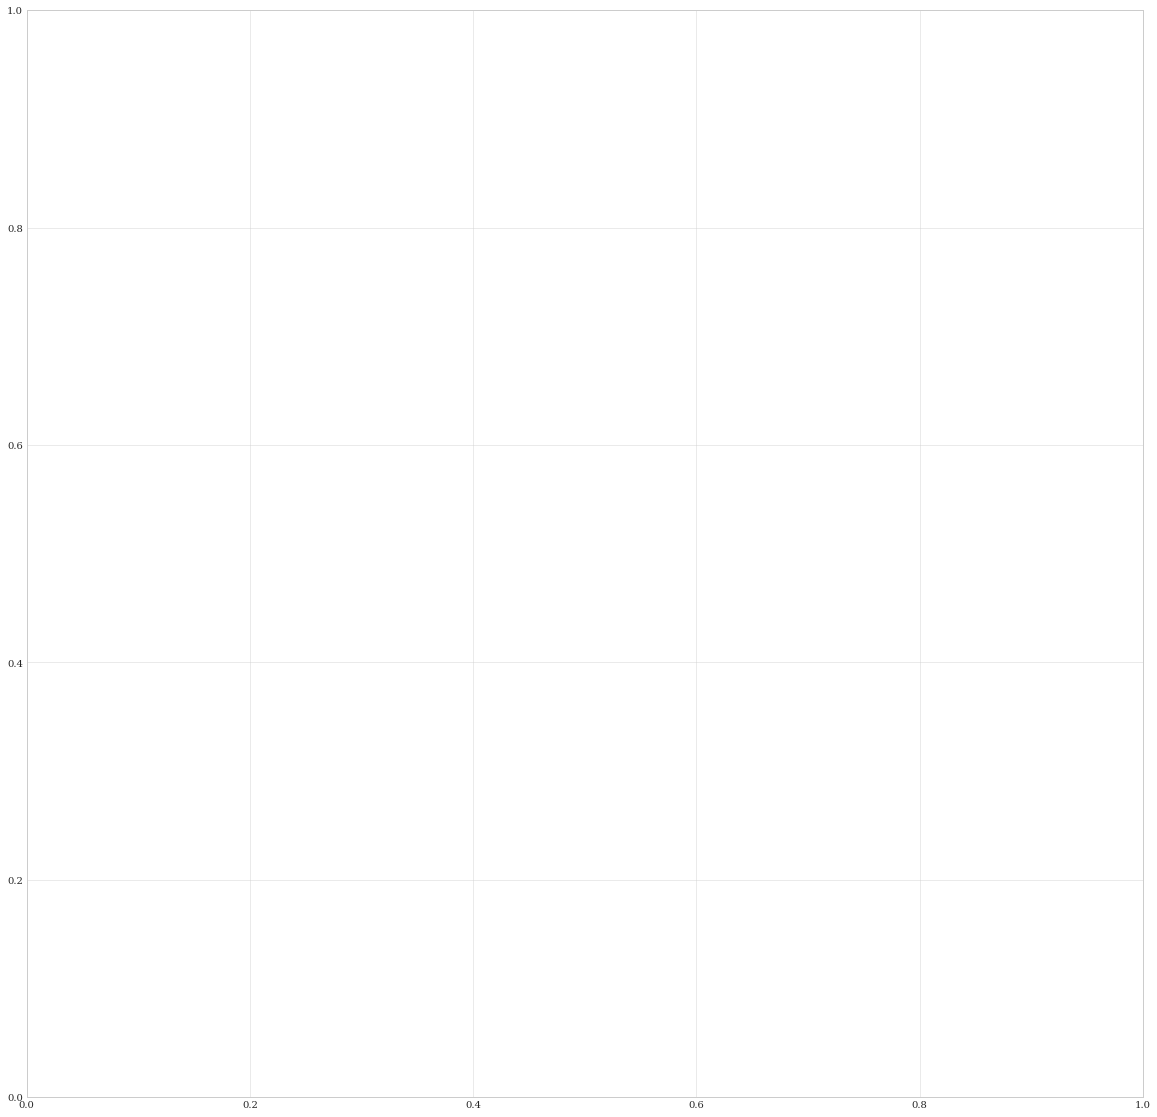

In [6]:


fig,ax = plt.subplots(nrows=1)


# x = np.array(x)
# y = np.array(y)

x_lab =  tmp['name'].values
y_price = tmp['true'].values
ax.bar(x_lab,y_price,color='#34495e')
ax.set_ylabel('count of events')
ax.set_xlabel('Trends')
# ax.plot(x_lab, y_price, "x",color='red',)
ax.grid(False)
plt.xticks(rotation=90)
plt.title('Count of events')
plt.savefig('plots/decreasing_events.png')
plt.savefig('../../fouyapen/assets/plots/ripple/decreasing_events.png')
plt.show()

In [26]:
# tmp = pd.DataFrame(result)

# fig,ax = plt.subplots(nrows=1)


# # x = np.array(x)
# # y = np.array(y)

# x_lab =  tmp['name'].values
# y_price = tmp['trend_decreasing_perc'].values



# ax.bar(x_lab,y_price,color='#34495e')
# ax.set_ylabel('percent decrease')
# ax.set_xlabel('date')
# # ax.plot(x_lab, y_price, "x",color='red',)
# ax.grid(False)
# plt.xticks(rotation=90)
# plt.title('Average decreasing change per days ')
# plt.savefig('plots/decreasing_trend.png')
# plt.savefig('../../fouyapen/assets/plots/ripple/decreasing_trend.png')
# plt.show()

In [12]:
data = pd.read_csv("data/XRP_price_20210608.csv")
data['date'] = data['time'].apply(to_date)
# data.to_csv('data/XRP_price_20210524.csv')

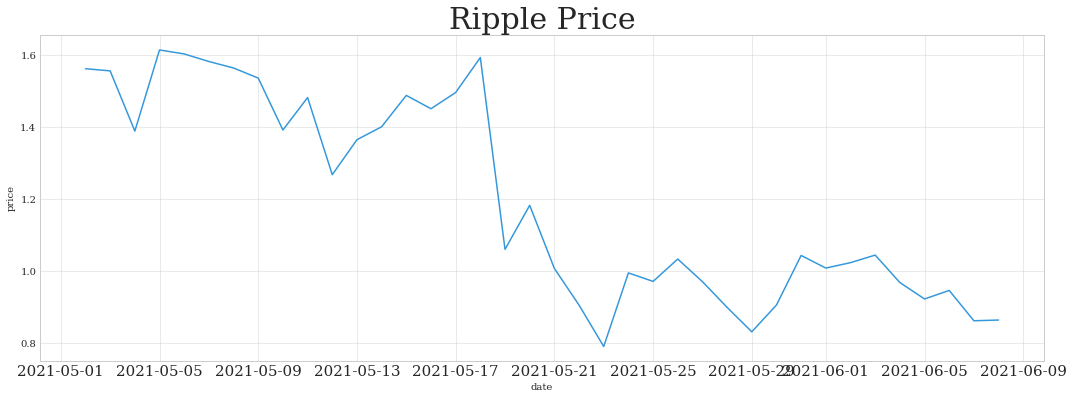

In [13]:
fig,ax = plt.subplots(nrows=1,figsize=(18,6))

data = data[data["date"] > pd.Timestamp("2021-05-01")]


x_lab =  data['date'].values
y_price = data['close'].values
ax.plot(x_lab,y_price,color='#3498db')
ax.set_ylabel('price')
ax.set_xlabel('date')
# ax.plot(x_lab, y_price, "x",color='red',)
ax.grid(True)
plt.title('Ripple Price')
plt.savefig('plots/ripple_price.png')
plt.savefig('../../fouyapen/assets/plots/ripple/ripple_price.png')
plt.show()

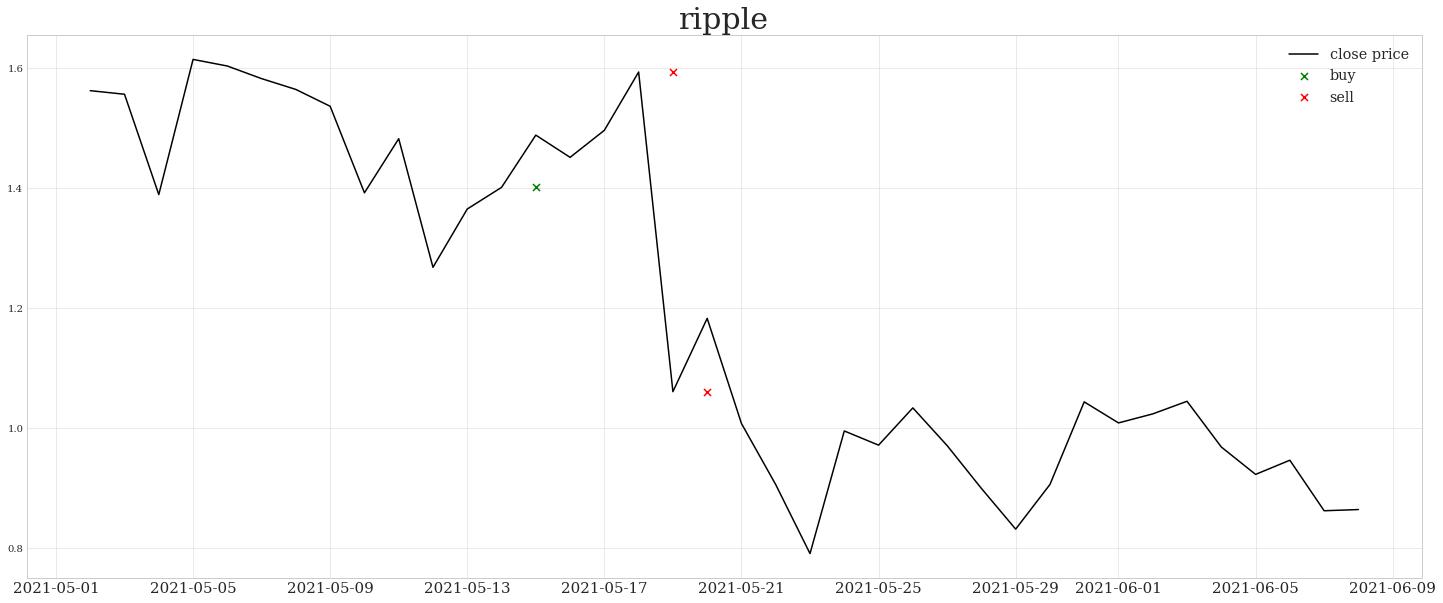

In [18]:
# df_result = pd.read_csv('ripple_trend_result.csv')
name = 'ripple'
data = pd.read_csv(f'{name}_trend_result.csv',skiprows=[0])
# data = data[~data['volume'].isna()]
data['datetime'] = [pd.Timestamp(e) for e in data['datetime'].values]


_cols =[
        'Id',
        'datetime', 
        'open',
        'high', 
        'low',
        'close',
        'volume', 
        'BuySell',
        'buy', 
        'sell', 
        'value'
       ]
data = data[_cols]
# display(df_result.head(3))





#buy signal
tmp_buy = data[~data['buy'].isna()]
#sell signal
tmp_sell = data[~data['sell'].isna()]



fig,ax = plt.subplots(figsize=(25,10))

x_val = tmp_buy['datetime'].values
y_val = tmp_buy['buy'].values

ax.scatter(x_val,y_val,color='green',label='buy',marker='x',s=50)


x_val = tmp_sell['datetime'].values
y_val = tmp_sell['sell'].values
ax.scatter(x_val,y_val,color='red',label='sell',s=50,marker='x')


ax.plot(data['datetime'],data['close'],color='black',label='close price')
plt.legend()
plt.grid(True)
plt.title(f'{name}')
plt.show()
plt.close()



In [90]:
# # df_settings[df_settings['name'] == 'test']['start_period'][0]
# df_settings[df_settings['name'] == 'test']['end_period'][0]

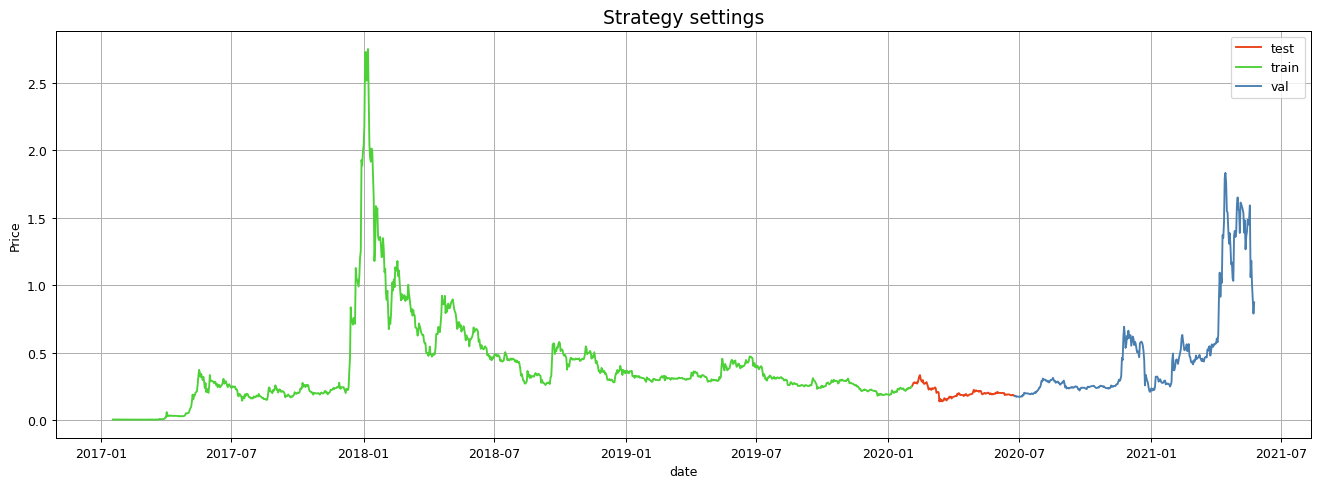

In [34]:

data = data.set_index("date")[['close','high','low']]




df_settings = pd.read_csv("data/settings.csv")
df_settings

fig,ax = plt.subplots(nrows=1,figsize=(18,6))


for (k,c) in zip(['test','train','val'],['#e84118','#4cd137','#487eb0']):
    end = df_settings[df_settings['name'] == k]['end_period'].values[0]
    start =  df_settings[df_settings['name'] == k]['start_period'].values[0]

    tmp = data.loc[pd.Timestamp(start):pd.Timestamp(end)]
    x_lab =  tmp.index
    y_price = tmp['close'].values
    ax.plot(x_lab,y_price,color=c,label=k,lw=1.5)
    ax.grid(True)

plt.xlabel('date')
plt.ylabel('Price')
plt.title("Strategy settings")
plt.legend()
plt.show()
plt.savefig('../../fouyapen/assets/plots/ripple/ripple_opt_settings.png')
plt.close()

## Decreasing trend events for ripple

In [46]:
np.mean
#y_price

<function numpy.mean(a, axis=None, dtype=None, out=None, keepdims=<no value>, *, where=<no value>)>

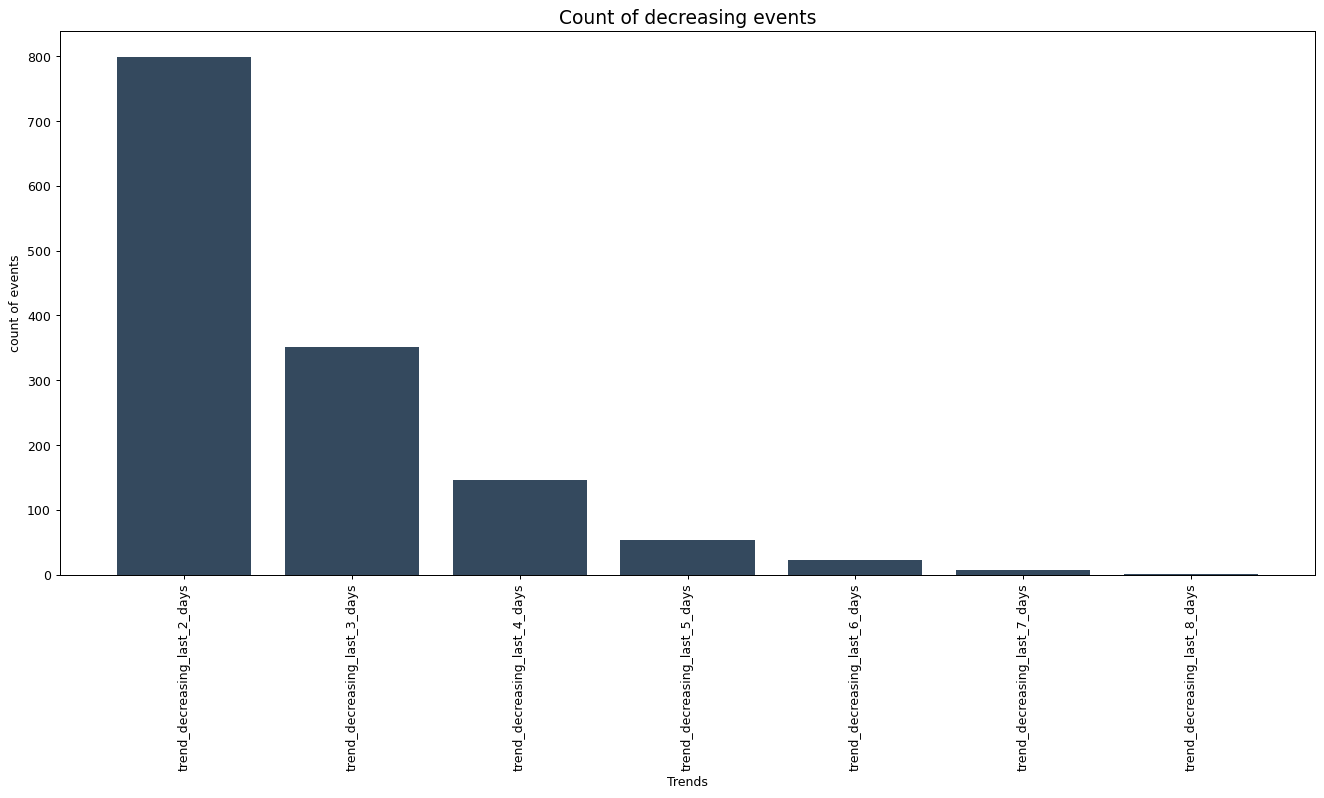

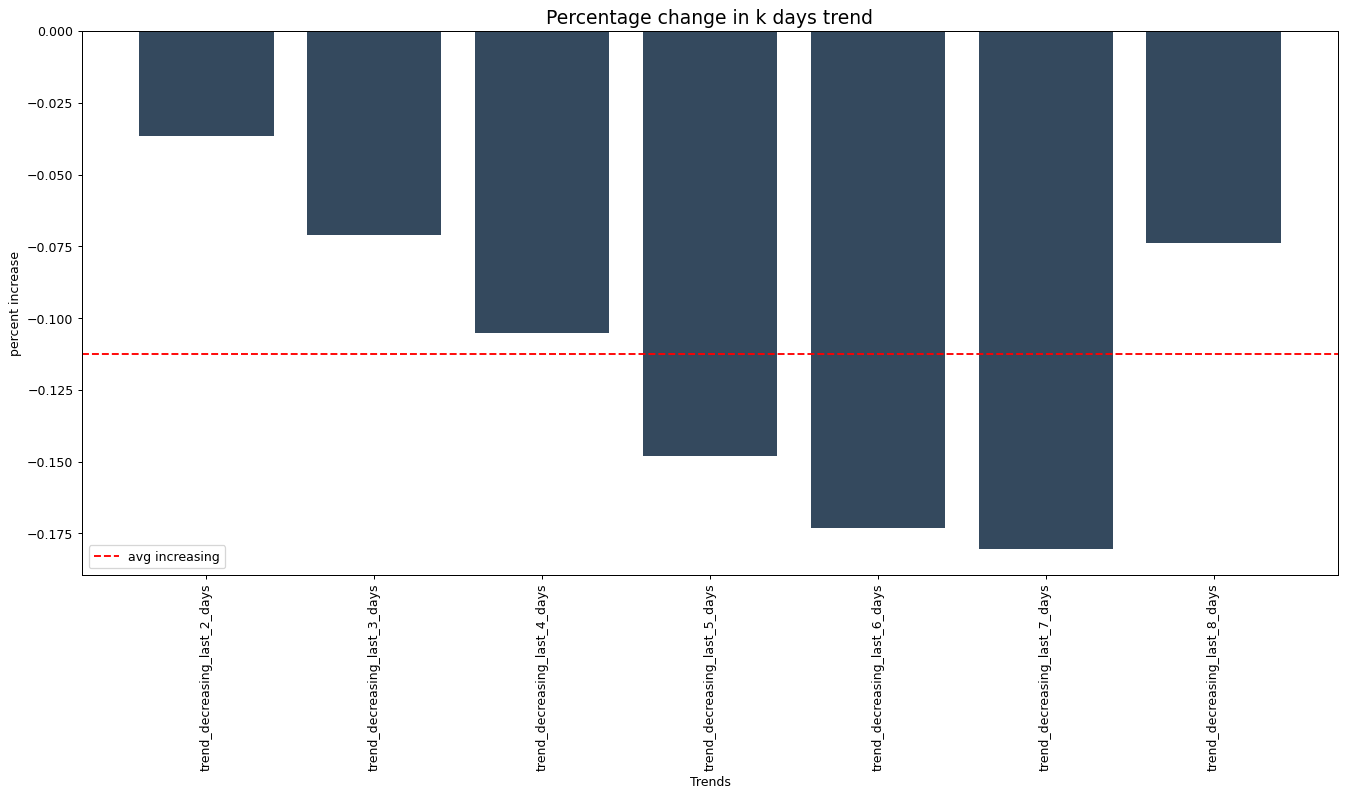

In [49]:
df_down = pd.read_csv('data/down_analysis.csv')
tmp = df_down.copy()

c ='#34495e'

fig,ax = plt.subplots(nrows=1)

x_lab =  tmp['name'].values
y_price = tmp['true'].values
ax.bar(x_lab,y_price,color=c)
ax.set_ylabel('count of events')
ax.set_xlabel('Trends')
ax.grid(False)
plt.xticks(rotation=90)
plt.title('Count of decreasing events')
plt.savefig('plots/decreasing_events.png')
plt.savefig('../../fouyapen/assets/plots/ripple/decreasing_events.png')
plt.show()




#==========
fig,ax = plt.subplots(nrows=1)
tmp.dropna(inplace=True)
x_lab =  tmp['name'].values
y_price = tmp['trend_decreasing_perc'].values



ax.bar(x_lab,y_price,color=c)
ax.set_ylabel('percent increase')
ax.set_xlabel('Trends')
ax.grid(False)
ax.axhline(np.mean(y_price),lw=1.5,color='red',ls='--',label=f'avg {trend}') 
plt.xticks(rotation=90)
plt.legend()
plt.title('Percentage change in k days trend')
plt.savefig('plots/increasing_trend.png')
plt.savefig('../../fouyapen/assets/plots/ripple/increasing_trend.png')
plt.show()



## Increasing Trends for ripple

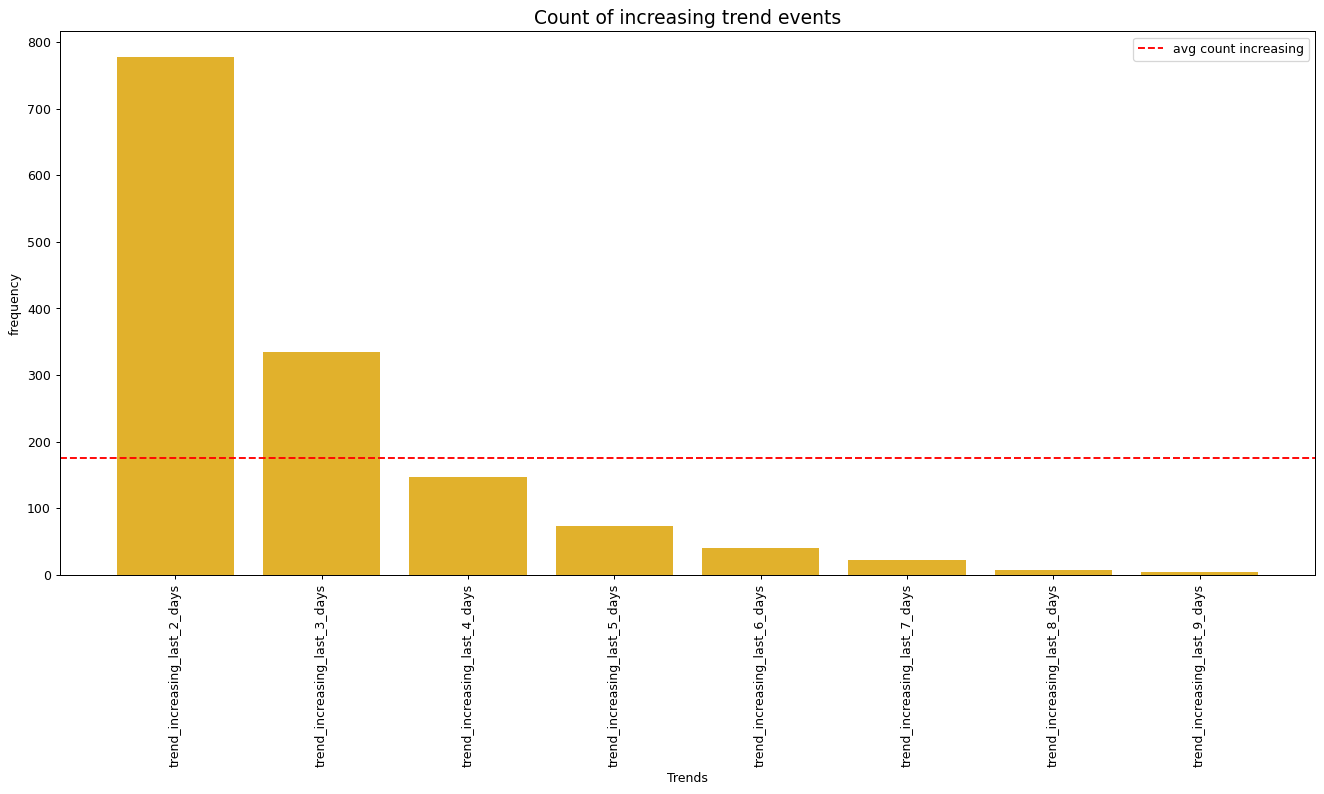

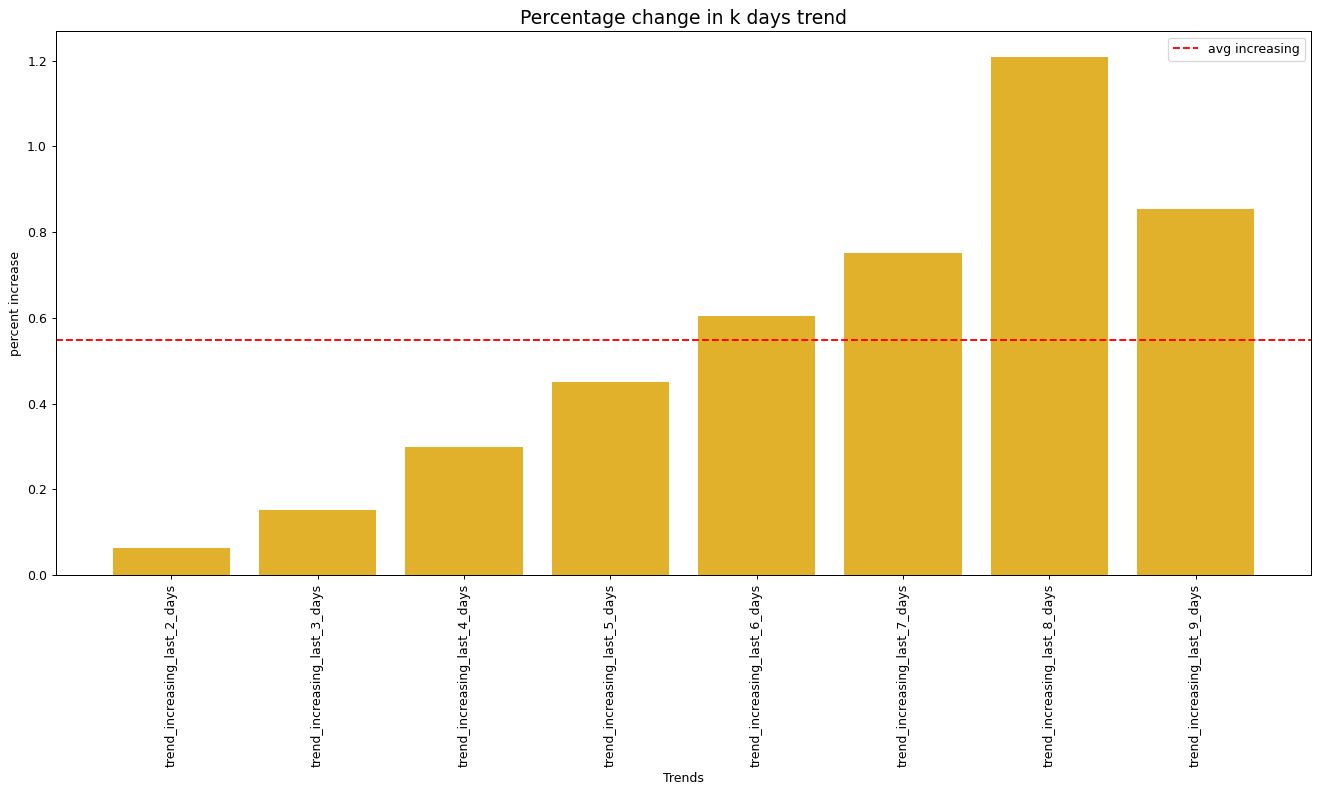

In [39]:
df_up = pd.read_csv('data/up_analysis.csv')
tmp = df_up

trend = 'increasing'
fig,ax = plt.subplots(nrows=1)


c ='#e1b12c'

x_lab =  tmp['name'].values
y_price = tmp['true'].values
ax.bar(x_lab,y_price,color=c)
ax.axhline(np.mean(y_price),lw=1.5,color='red',ls='--',label=f'avg count {trend}') 
ax.set_ylabel('frequency')
ax.set_xlabel('Trends')
plt.legend()
# ax.plot(x_lab, y_price, "x",color='red',)
ax.grid(False)
plt.xticks(rotation=90)
plt.title('Count of increasing trend events')
plt.savefig('plots/increasing_events.png')
plt.savefig('../../fouyapen/assets/plots/ripple/increasing_event.png')
plt.show()





#==========
fig,ax = plt.subplots(nrows=1)


x_lab =  tmp['name'].values
y_price = tmp['trend_increasing_perc'].values



ax.bar(x_lab,y_price,color=c)
ax.set_ylabel('percent increase')
ax.set_xlabel('Trends')
ax.grid(False)
ax.axhline(np.mean(y_price),lw=1.5,color='red',ls='--',label=f'avg {trend}') 
plt.xticks(rotation=90)
plt.legend()
plt.title('Percentage change in k days trend')
plt.savefig('plots/increasing_trend.png')
plt.savefig('../../fouyapen/assets/plots/ripple/increasing_trend.png')
plt.show()



,name,trend_increasing_perc,true,false
0,trend_increasing_last_2_days,0.063335,777,811
1,trend_increasing_last_3_days,0.151681,334,1254
2,trend_increasing_last_4_days,0.298572,147,1441
3,trend_increasing_last_5_days,0.450977,74,1514
4,trend_increasing_last_6_days,0.603150,40,1548
5,trend_increasing_last_7_days,0.750885,22,1566
6,trend_increasing_last_8_days,1.207895,8,1580
7,trend_increasing_last_9_days,0.853223,4,1584


In [56]:
res = [1.008, 0.9063, 0.7915]
n = len(res)
[print(i,j) for i, j in zip(res[-n:], res[1:])]

1.008 0.9063
0.9063 0.7915


[None, None]

[0.9063, 0.7915]

In [57]:
res[-n:]

[1.008, 0.9063, 0.7915]

In [52]:
data.tail(10)

,close,high,low
date,,,
2021-05-15,1.4880,1.5840,1.3220
2021-05-16,1.4510,1.6120,1.3400
2021-05-17,1.4960,1.5630,1.3250
2021-05-18,1.5930,1.7050,1.4720
2021-05-19,1.0610,1.6450,0.9385
2021-05-20,1.1830,1.3000,0.9336
2021-05-21,1.0080,1.2200,0.8688
2021-05-22,0.9063,1.0180,0.8196
2021-05-23,0.7915,0.9681,0.6510


## Create a feature: that compare the current price with the last k days price
- pct change
- lw or gt


In [ ]:
def _compare(a,b):
    a = np.float64(a)
    b = np.float64(b)
    
    if a > b:
        return True
    return False

df['lag'] = df['Close'].shift(1)

k= 5 
df[f'max_at_{k}_days'] = df['lag'].rolling(window=k,min_periods=k).max()